In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Load Data
def load_data(file_path):
    """Loads CSV dataset into a Pandas DataFrame."""
    return pd.read_csv(file_path)

# Step 2: Encode Categorical Columns
def encode_effect_strength(df):
    """Encodes 'Effect' and 'Evidence Strength' columns."""
    df['Effect'] = df['Effect'].map({'Protective': 0, 'Negative': 1})
    df['Evidence Strength'] = df['Evidence Strength'].map({'Weak evidence': 1, 'Moderate evidence': 2, 'Strong evidence': 3})
    return df

# Step 3: Encode 'Cancer Type'
def encode_cancer_type(df):
    """Encodes 'Cancer Type' as numerical labels."""
    label_encoder = LabelEncoder()
    df['Cancer Type'] = label_encoder.fit_transform(df['Cancer Type'])
    return df, label_encoder

# Step 4: Aggregate Risk Factors into Patient Profiles
def generate_patient_profiles(df, num_patients=1000, risk_factors_per_patient=4):
    unique_risk_factors = df['Risk Factor'].unique()
    patients = []
    
    for _ in range(num_patients):
        selected_risks = np.random.choice(unique_risk_factors, risk_factors_per_patient, replace=False)
        filtered_df = df[df['Risk Factor'].isin(selected_risks)]
        
        # Aggregate numerical features
        numeric_cols = ['Effect', 'Evidence Strength']
        patient_data = filtered_df.groupby('Cancer Type')[numeric_cols].mean().reset_index()

        # Keep Risk Factor as a concatenated string
        patient_data['Risk Factors'] = ", ".join(selected_risks)
        patient_data['Patient ID'] = _  # Assign patient ID
        
        patients.append(patient_data)
    
    return pd.concat(patients, ignore_index=True)


def encode_risk_factors(df):
    from sklearn.preprocessing import MultiLabelBinarizer
    
    # Ensure Risk Factors are stored as lists
    df['Risk Factors'] = df['Risk Factors'].apply(lambda x: x.split(', '))
    
    # Multi-Label Binarizer
    mlb = MultiLabelBinarizer()
    risk_factor_encoded = mlb.fit_transform(df['Risk Factors'])
    
    risk_factor_df = pd.DataFrame(risk_factor_encoded, columns=mlb.classes_)
    
    return pd.concat([df.drop(columns=['Risk Factors']), risk_factor_df], axis=1)


# Step 6: Run the Entire Preprocessing Pipeline
def preprocess_pipeline(file_path):
    """Runs all preprocessing steps and returns the final DataFrame."""
    df = load_data(file_path)
    df = encode_effect_strength(df)
    df, label_encoder = encode_cancer_type(df)
    df = generate_patient_profiles(df)
    df = encode_risk_factors(df)
    return df, label_encoder

# Example Usage:
final_df, label_enc = preprocess_pipeline("cancer prediction dataset - MY.csv")
print(final_df.head())

   Cancer Type    Effect  Evidence Strength  Patient ID  Alcohol consumption  \
0            0  0.000000           3.000000           0                    0   
1            1  0.000000           2.500000           0                    0   
2            2  0.600000           2.600000           0                    0   
3            0  0.434783           2.772727           1                    0   
4            1  0.000000           3.000000           1                    0   

   Diabetes  Family history of colorectal cancer (CRC)  \
0         0                                          0   
1         0                                          0   
2         0                                          0   
3         0                                          0   
4         0                                          0   

   Family history of gastric cancer  Fast eating  Fruit consumption  ...  \
0                                 1            1                  0  ...   
1                 

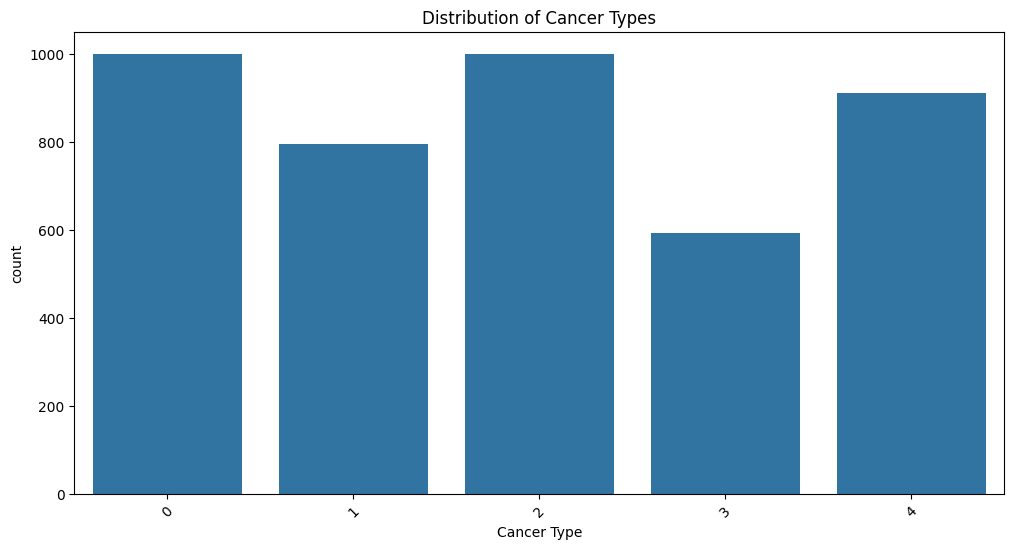

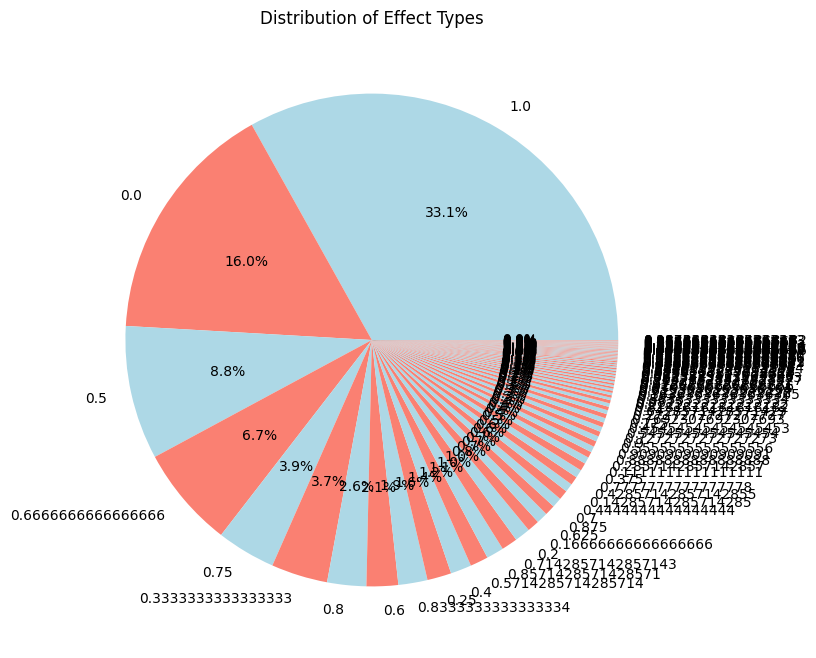

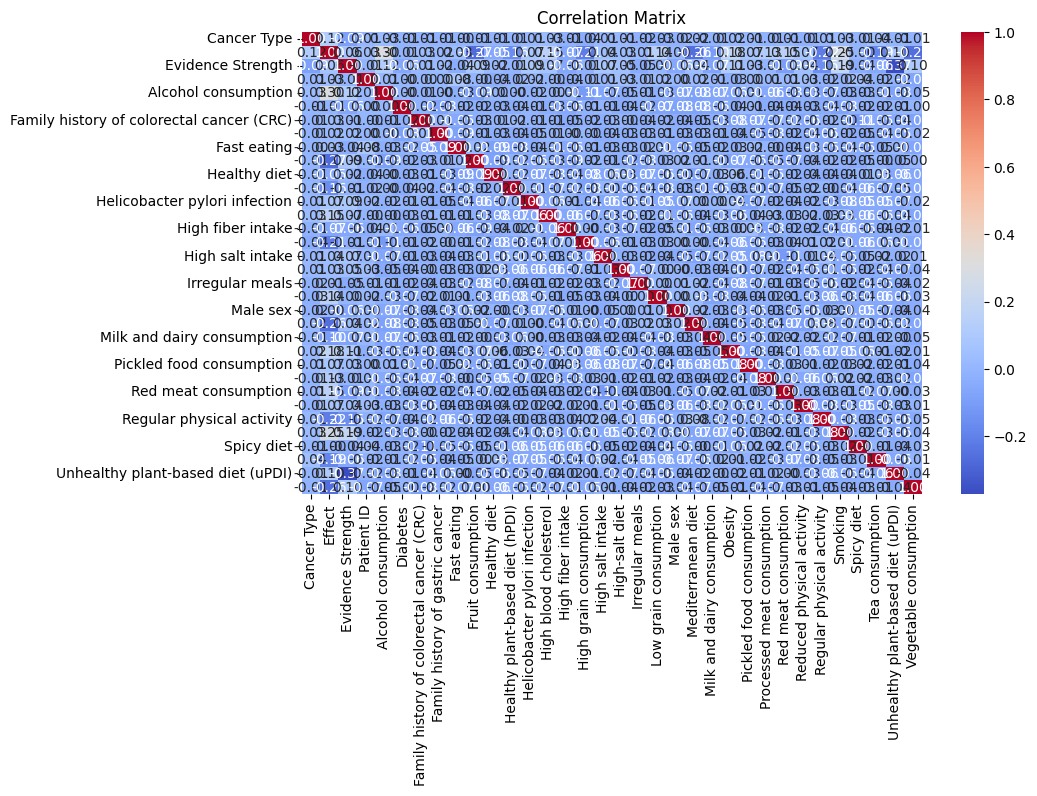

In [2]:
# Step 6: Train Decision Tree Model and Evaluate Metrics
def train_decision_tree(df):
    """Trains a Decision Tree classifier and returns the trained model along with evaluation metrics."""
    X = df.drop(columns=['Cancer Type', 'Patient ID'])
    y = df['Cancer Type']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    report = classification_report(y_test, y_test_pred)
    
    metrics = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Classification Report": report
    }
    
    return model, metrics

# Step 7: Visualizations
def visualize_data(df):
    """Generates visualizations including distribution plots and correlation matrix."""
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Cancer Type', data=df)
    plt.title("Distribution of Cancer Types")
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(8, 8))
    df['Effect'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'])
    plt.title("Distribution of Effect Types")
    plt.ylabel('')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()

# Step 8: Run the Entire Preprocessing Pipeline
def preprocess_pipeline(file_path):
    """Runs all preprocessing steps and returns the final DataFrame along with model metrics."""
    df = load_data(file_path)
    df = encode_effect_strength(df)
    df, label_encoder = encode_cancer_type(df)
    df = generate_patient_profiles(df)
    df = encode_risk_factors(df)
    visualize_data(df) 
    model, metrics = train_decision_tree(df)
    return model, metrics, label_encoder

model, metrics, label_enc = preprocess_pipeline("cancer prediction dataset - MY.csv")

In [3]:
for key, value in metrics.items():
    print(f"{key}: {value}")

Train Accuracy: 0.9138533178114087
Test Accuracy: 0.6116279069767442
Precision: 0.6136104757078787
Recall: 0.6116279069767442
F1 Score: 0.6115031760362424
Classification Report:               precision    recall  f1-score   support

           0       0.61      0.63      0.62       202
           1       0.58      0.63      0.60       172
           2       0.57      0.60      0.58       202
           3       0.55      0.46      0.50       105
           4       0.74      0.68      0.71       179

    accuracy                           0.61       860
   macro avg       0.61      0.60      0.60       860
weighted avg       0.61      0.61      0.61       860

